In [1]:
import pandas as pd
df = pd.read_csv('train.csv')


In [3]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [4]:
# Get statistical summaries of numerical columns
print(df.describe())

                age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      243.472334   
std       15.867412             228.819900      398.289149   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          3.463397  
std             19444.806226        194.063624          1.409661  
min               800.460000       -760.661236         -1.000000  
25%             14177.540000        616.150000          3.000000  
50%             27554.485000        697

In [5]:
# Fill missing values in 'region_category' with the most frequent category
df['region_category'].fillna(df['region_category'].mode()[0], inplace=True)

# Fill missing values in 'preferred_offer_types' with the most frequent offer type
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0], inplace=True)

# Impute missing values in 'points_in_wallet' with the mean value
df['points_in_wallet'].fillna(df['points_in_wallet'].mean(), inplace=True)


In [6]:
# Check the number of unique categories in each column
categorical_cols = ['gender', 'region_category', 'membership_category', 'joined_through_referral',
                    'preferred_offer_types', 'medium_of_operation', 'internet_option',
                    'used_special_discount', 'offer_application_preference', 'past_complaint',
                    'complaint_status', 'feedback']

for col in categorical_cols:
    unique_categories = df[col].nunique()
    print(f"{col}: {unique_categories} unique categories")


gender: 3 unique categories
region_category: 3 unique categories
membership_category: 6 unique categories
joined_through_referral: 3 unique categories
preferred_offer_types: 3 unique categories
medium_of_operation: 4 unique categories
internet_option: 3 unique categories
used_special_discount: 2 unique categories
offer_application_preference: 2 unique categories
past_complaint: 2 unique categories
complaint_status: 5 unique categories
feedback: 9 unique categories


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Perform label encoding for the columns with a small number of unique categories
columns_to_label_encode = ['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types',
                           'medium_of_operation', 'internet_option', 'used_special_discount',
                           'offer_application_preference', 'past_complaint']

for col in columns_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [8]:
# Perform one-hot encoding for the 'membership_category' column
df = pd.get_dummies(df, columns=['membership_category'], prefix='membership')


In [9]:
# Convert 'joining_date' to datetime format
df['joining_date'] = pd.to_datetime(df['joining_date'])

# Convert 'last_visit_time' to datetime format
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S')


In [10]:
# Extract year from 'joining_date'
df['joining_year'] = df['joining_date'].dt.year

# Extract month from 'joining_date'
df['joining_month'] = df['joining_date'].dt.month

# Extract day of the week from 'last_visit_time'
df['last_visit_dayofweek'] = df['last_visit_time'].dt.dayofweek


In [11]:
print(df['complaint_status'].value_counts())


Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Perform label encoding for 'complaint_status' column
df['complaint_status'] = label_encoder.fit_transform(df['complaint_status'])


In [13]:
print(df['feedback'].value_counts())


Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64


In [14]:
# Perform one-hot encoding for the 'feedback' column
df = pd.get_dummies(df, columns=['feedback'], prefix='feedback')


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
num_cols = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet']
df[num_cols] = imputer.fit_transform(df[num_cols])

# Perform feature scaling using standardization
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [16]:
# Check missing values in numerical columns
print(df[num_cols].isnull().sum())

# Check mean and standard deviation of numerical columns
print(df[num_cols].mean())
print(df[num_cols].std())


age                      0
days_since_last_login    0
avg_time_spent           0
avg_transaction_value    0
points_in_wallet         0
dtype: int64
age                     -7.356668e-17
days_since_last_login   -1.152481e-17
avg_time_spent          -2.938826e-17
avg_transaction_value   -1.114065e-17
points_in_wallet         1.619235e-16
dtype: float64
age                      1.000014
days_since_last_login    1.000014
avg_time_spent           1.000014
avg_transaction_value    1.000014
points_in_wallet         1.000014
dtype: float64


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the training data
df_train = pd.read_csv('train.csv')

# Perform necessary preprocessing steps
# Example steps:
# 1. Drop irrelevant columns
df_train = df_train.drop(['customer_id', 'Name', 'security_no'], axis=1)

# 2. Convert date column to datetime
df_train['joining_date'] = pd.to_datetime(df_train['joining_date'])

# 3. Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types',
                    'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference',
                    'past_complaint', 'complaint_status', 'feedback']

for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

# 4. Handle missing values
# Example: Fill missing values in numerical columns with mean
df_train['avg_time_spent'].fillna(df_train['avg_time_spent'].mean(), inplace=True)
df_train['points_in_wallet'].fillna(df_train['points_in_wallet'].mean(), inplace=True)

# Split the data into features and target variable
X = df_train.drop('churn_risk_score', axis=1)
y = df_train['churn_risk_score']

# Continue with the rest of the code (e.g., splitting the data, model training, etc.)


In [18]:
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(float)


In [19]:
df['joining_year'] = df['joining_date'].dt.year
df['joining_month'] = df['joining_date'].dt.month
df['last_visit_dayofweek'] = df['last_visit_time'].dt.dayofweek

df = df.drop(['joining_date', 'last_visit_time'], axis=1)


In [20]:
non_numeric_columns = df.select_dtypes(include='object').columns.tolist()
print(non_numeric_columns)


['customer_id', 'Name', 'security_no', 'referral_id']


In [21]:
non_numeric_columns = ['customer_id', 'Name', 'security_no', 'referral_id']
df.drop(non_numeric_columns, axis=1, inplace=True)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Assuming your data is stored in a DataFrame called 'df'

# Define the features (X) and target variable (y)
features = df.drop(['churn_risk_score'], axis=1)
target = df['churn_risk_score']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training and validation data
X_train_imputed = imputer.transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model on the imputed training data
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the imputed validation data
y_pred = rf_model.predict(X_val_imputed)


In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7423976213001757


In [24]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print(report)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       236
           1       0.70      0.76      0.73       506
           2       0.76      0.75      0.76       548
           3       0.87      0.90      0.89      2087
           4       0.68      0.53      0.59      2020
           5       0.68      0.87      0.77      2002

    accuracy                           0.74      7399
   macro avg       0.61      0.64      0.62      7399
weighted avg       0.72      0.74      0.72      7399



C:\Users\sandu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

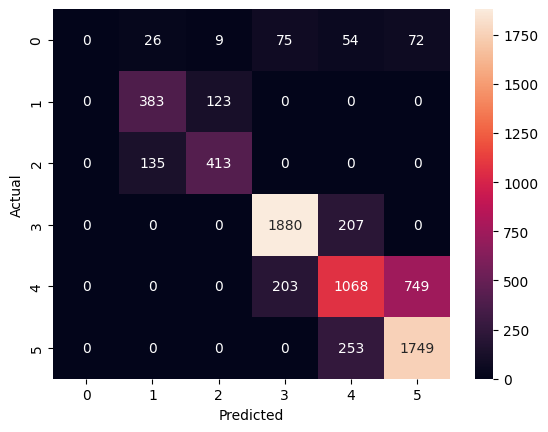

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [26]:
import pandas as pd

# Retrieve Feature Importances
feature_importances = rf_model.feature_importances_

# Match Feature Importances with Feature Names
feature_names = df.columns

# Check if the lengths match
if len(feature_names) == len(feature_importances):
    # Create a Feature Importance DataFrame
    feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Sort the DataFrame
    feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

    # Get the Top Churn Drivers
    top_churn_drivers = feature_importances_df.head(10)  # Select the top 'n' churn drivers

    print(top_churn_drivers)
else:
    # Adjust the length of feature_names to match feature_importances
    feature_names = feature_names[:len(feature_importances)]

    # Create a Feature Importance DataFrame
    feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Sort the DataFrame
    feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

    # Get the Top Churn Drivers
    top_churn_drivers = feature_importances_df.head(10)  # Select the top 'n' churn drivers

    print(top_churn_drivers)


                           Feature  Importance
11                points_in_wallet    0.218923
9            avg_transaction_value    0.087448
16                churn_risk_score    0.064618
18      membership_Gold Membership    0.061633
8                   avg_time_spent    0.047100
10        avg_frequency_login_days    0.044011
0                              age    0.040975
7            days_since_last_login    0.036868
23                    joining_year    0.031124
20  membership_Platinum Membership    0.030837
